In [1]:
from flask import Flask, jsonify
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import re
import demoji
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
from PIL import features

In [2]:
df_kbbi = pd.read_csv("new_kamusalay.csv", encoding='latin-1', names=['TIDAKBAKU', 'BAKU'])

ABS = pd.read_csv("abusive.csv")

data = pd.read_csv("data.csv", encoding='latin-1')

# data2 = data[[0]]


In [3]:
data['Tweet']

0        - disaat semua cowok berusaha melacak perhatia...
1        RT USER: USER siapa yang telat ngasih tau elu?...
2        41. Kadang aku berfikir, kenapa aku tetap perc...
3        USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4        USER USER Kaum cebong kapir udah keliatan dong...
                               ...                        
13164    USER jangan asal ngomong ndasmu. congor lu yg ...
13165                         USER Kasur mana enak kunyuk'
13166    USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13167    USER USER USER USER Bom yang real mudah terdet...
13168    USER Mana situ ngasih(": itu cuma foto ya kuti...
Name: Tweet, Length: 13169, dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [5]:
data.duplicated().sum()


125

In [6]:
Individu = data['HS_Individual'].sum()
print(Individu)
Group = data['HS_Group'].sum()
print(Group)
Religion = data['HS_Religion'].sum()
print(Religion)
Race = data['HS_Race'].sum()
print(Race)
Physical = data['HS_Physical'].sum()
print(Physical)    
Gender = data['HS_Gender'].sum()
print(Gender)
Others = data['HS_Other'].sum()
print(Others)
Weak = data['HS_Weak'].sum()
print(Weak)
Moderate = data['HS_Moderate'].sum()
print(Moderate)
Strong = data['HS_Strong'].sum()
print(Strong)

3575
1986
793
566
323
306
3740
3383
1705
473


In [7]:
Individu 
Group 
Religion
Race 
Physical
Gender
Others 
Weak 
Moderate 
Strong 

473

In [8]:
JumlahABS = data['Abusive'].sum()   
JumlahABS

5043

In [9]:
jumlahHS = data['HS'].sum()
jumlahHS

5561

In [10]:
division = ['Individu', 'Group', 'Religion', 'Race', 'Physical', 'Gender', 'Otthers', 'Weak', 'Moderate', 'Strong']
division_average_marks = [Individu, Group, Religion, Race, Physical, Gender, Others, Weak, Moderate, Strong]

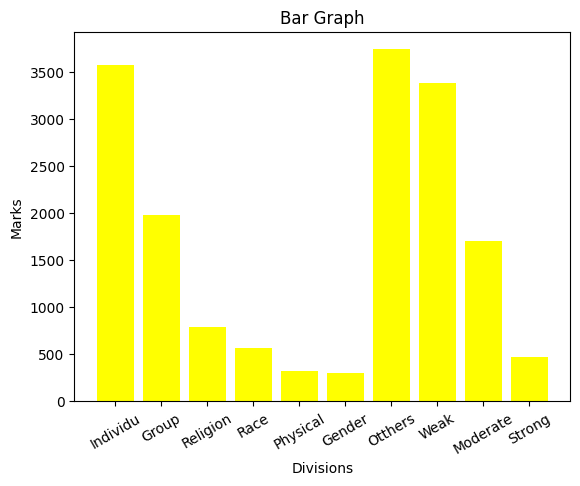

In [11]:
plt.bar(division, division_average_marks, color='Yellow')
plt.title('Bar Graph')
plt.xlabel('Divisions')
plt.ylabel('Marks')
plt.xticks(rotation=30)
plt.show()

In [12]:
firms = ['Abusive', 'Heat Speach']
market_share =[JumlahABS, jumlahHS]
Explode = [0.1,0.2]

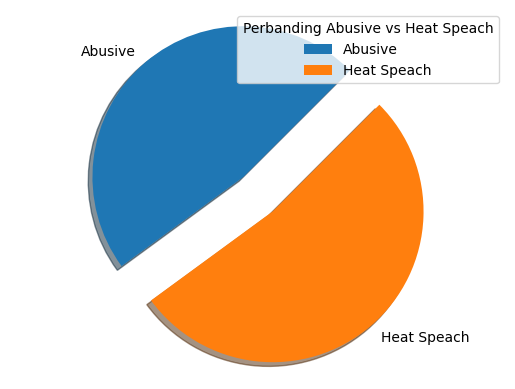

In [13]:
plt.pie(market_share, explode=Explode, labels=firms, shadow=True, startangle=45)
plt.axis('equal')
plt.legend(title='Perbanding Abusive vs Heat Speach')
plt.show()

In [14]:
data = data.drop_duplicates(subset='Tweet', keep='first').reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13023 entries, 0 to 13022
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          13023 non-null  int64 
 1   Tweet          13023 non-null  object
 2   HS             13023 non-null  int64 
 3   Abusive        13023 non-null  int64 
 4   HS_Individual  13023 non-null  int64 
 5   HS_Group       13023 non-null  int64 
 6   HS_Religion    13023 non-null  int64 
 7   HS_Race        13023 non-null  int64 
 8   HS_Physical    13023 non-null  int64 
 9   HS_Gender      13023 non-null  int64 
 10  HS_Other       13023 non-null  int64 
 11  HS_Weak        13023 non-null  int64 
 12  HS_Moderate    13023 non-null  int64 
 13  HS_Strong      13023 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 1.4+ MB


In [15]:
def kategoriumum(x):
    if x['HS'] == 1 and x['Abusive'] == 1:
        return 'Mengandung kata kasar'
    elif x['HS'] == 1 and x['Abusive'] == 0:
        return 'Mengandung kata kasar'
    elif x['HS'] == 0 and x['Abusive'] == 1:
        return 'Mengandung kata kasar'
    else:
        return 'Tidak mengandung kata kasar'

data['Probality'] = data.apply(kategoriumum, axis=1)

In [16]:
data['Probality'].value_counts()

Probality
Mengandung kata kasar          7243
Tidak mengandung kata kasar    5780
Name: count, dtype: int64

<Axes: xlabel='Probality', ylabel='count'>

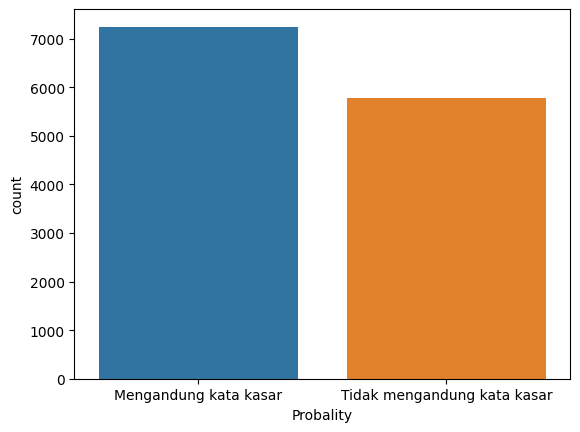

In [17]:
sns.countplot(x=data['Probality'])